# Project: Access and analyze books from online website

### Data Source: http://books.toscrape.com/

### Introduction: 
Books to scrape is a fictional book store's website which has books of 50 different genres types. It is a demo website created for web scraping purposes. The website hosts nearly 1000 books which has random prices (in £) and ratings assigned. Additionally each book has information such as book stock availability, book description, genre type etc..,

### Web Scraping:
Information or data in a website can be collected either by human beings or by automated code. However manually getting all data from a website can be very tedious and time consuming. So we can automate the process by a code which can get all information from the website. This process of extracting information from a website is called web scraping. Depending on the structure of the website that contains the necessary data, code can be developed accordingly to access the data from those structural elements. 
**Drawback:** Major drawback of webscraping is that if the structure of the webpage is altered anytime then the code has to be modified accordingly.

More information: https://en.wikipedia.org/wiki/Web_scraping

### Project description:
Books to scrape website has its information structured in the form of [html](https://www.w3schools.com/html/). In this project I have tried to explore and use a new Python library called [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/). I have scraped important information such as stock availability, ratings, price, description and titles of all books listed in the website. Using the scraped information I am trying to answer the below mentioned research questions by creating visualizations.

#### Research Questions:
1. What are the top 10 genre types ordered by number of unique book titles available for an user to buy when user specifies the budget and also the ratings while purchasing? ***Note:*** Exclude genre types 'Default' and 'Add a comment' that makes no sense in this case 

2. For a given user rating, what is the most common word in book title that influences people to read and give good ratings? 

### Limitations: 
Since most of the data collected from this website is descriptive, only qualitative analysis can be done

### Part 1: Scraping data from the website:
Part 1 contains 3 individual functions which are all collectively stored under 1 main function called main_scraping_allbooksinfo() at the end of Part 1. Please execute main_scraping_allbooksinfo() to scrape all data from website of scope

#### Getting header information of webpage
Open the webpage http://books.toscrape.com/ and understand its structure. **Note:** Webpage says there are 1000 books and shows 20 books in each page. Instead of hard coding this information we have to write a code to get this information from webpage so that our code remains dynamic with changes to book numbers

In order to understand which html tags hold this information press [Ctrl+U](view-source:http://books.toscrape.com) to view the **source code** of the page. The below pasted function will help you to parse information such as total books, number of pages and books displayed per page in the website from html tags and return to process more information

**Try**: collect_headerinfo() and save it in a tuple Books,perpage,pages. When you print Books,perpage,pages it should return below answers<br>
**Expected answer**: 1000 20 50

In [195]:
import requests as r
from bs4 import BeautifulSoup as bs
url='http://books.toscrape.com/'

def collect_headerinfo():
    '''This function is used to collect the header info such as number of books in website, pages in website and per page display count for http://books.toscrape.com'''
    response=r.get(url)  #getting the response from the webpage
    page_response_html = bs(response.text, 'html.parser')   ##gparsing the response from webpage in html format
    pageinfo=page_response_html.find('form',{'class':'form-horizontal'})    # in the html response look for tag 'form' which has an attribute called class with a value form-horizontal
    headerinfo=pageinfo.findChildren()   ##within that extracted 'form' tag get all individual elements
    Totalbooks_count=int(headerinfo[1].text)  ##getting total books count in the website for which information is available
    perpagecount=int(headerinfo[3].text) ##finding the number of books displayed per page
    Totalpages=int(Totalbooks_count/perpagecount)   ## dividing total books and per page books count to get total pages in website

    ##alternative for finding pages  page_response_html.find('li',{'class':'current'}).text[40:42]
    
    return Totalbooks_count,perpagecount,Totalpages

#Books,perpage,pages=collect_headerinfo()
#print(Books,perpage,pages)

#### Getting weblinks for all books in webpage
To get information about each book we will have to click on each book if we have to do it manually. In order to do this by code all we need is url of each book. 
1. Each book url has the book title in it which is dynamic and unknown for us now. eg: for the 1st book unknown part is a-light-in-the-attic_1000/index.html 
2. However the source code of each page has tags that contain unknown part of each book url which we can parse for all books.
3. From the parsed tags we can use **for** loop to extract the unknown part text for each book and add it to known text (http://books.toscrape.com/catalogue/) to form full url for each book and append it to the list.
4. We should repeat the process for all 50 pages in the website using another for loop that goes through each page. *Hint:* Each page url is of the form http://books.toscrape.com/catalogue/page-(pagenumber).html <br>

***Note:*** A progress bar will be shown when data is being extracted from webpage

Below posted function will help you to get weblinks for all the books present in the books to scrape webpage. This code is dynamic and will work even when the collection of books in webpage changes 

**Try:** get_eachbooklinks(pages,perpage) where pages & perpage are results from previous function and save it in a variable called books_url. books_url[:5] should give below results <br> 
**Expected answer:**  ['http://books.toscrape.com/catalogue/a-light-in-the-attic_1000/index.html',<br>
 'http://books.toscrape.com/catalogue/tipping-the-velvet_999/index.html',<br>
 'http://books.toscrape.com/catalogue/soumission_998/index.html',<br>
 'http://books.toscrape.com/catalogue/sharp-objects_997/index.html',<br>
 'http://books.toscrape.com/catalogue/sapiens-a-brief-history-of-humankind_996/index.html'] 

In [196]:
def get_eachbooklinks(Totalpages,perpagecount):
    '''This function needs totalpages and perpagedisplay count for http://books.toscrape.com and returns a list of weburls to access each book in this website '''
    bookurllist=[] ##initiating empty list to collect all book weblinks
    print("Progress of data downloaded from web") ##message to user
    for page in range(1,Totalpages+1):  ##go through different pages in website
        page_url=url+'catalogue/page-'+str(page)+'.html'    ##this forms the url for each page to navigate
        page_response=r.get(page_url)               ##for each page get the response
        page_response_html=bs(page_response.text,'html.parser')  ##gets the response in html format
        allbook_weblinks_tags=page_response_html.find_all('div',{'class':'image_container'})    ##in each page finds all tags'div' with attribute 'class' with value 'image_container' and saves as a list (contains 20 tags 1 for each book in each page)
        print('.',end='') ##progress bar
        for book in range(perpagecount):  ##to get full weblink for each book
            each_booklink_partial=allbook_weblinks_tags[book].findChildren()[0]['href']  ##go to each element corresponding to each book saved above , find inner tags and its attributes that has the partial weblink name
            bookurl=url+'catalogue/'+each_booklink_partial  ##structure to form full weblink name for each book
            bookurllist.append(bookurl)   ##add the new full weblink of each book to list
    return bookurllist

#books_url=get_eachbooklinks(pages,perpage)
#books_url[:5]

#### Forming dataset with all information for all books to perform further analysis 
1. Now that we have weblinks for all the books we have to use a for loop to go through each booklink and then parse information that we need by taking advantage of html tags and elements. 
2. Spend time viewing the source code for each book page and identify the respective tags and elements from which required information can be obtained. 
<br>
[find_all](https://www.crummy.com/software/BeautifulSoup/bs4/doc/#calling-a-tag-is-like-calling-find-all), [findChildren](http://omz-software.com/pythonista/docs/ios/beautifulsoup_ref.html) can be very useful in parsing information.<br> 
3. Parsed information is then added to corresponding lists for books
4. Once all lists have all information for all books they are combined together to form a dataframe
5. The column names of dataframe are modified for easy identification

***Note:*** This function has a progress bar which will also notify percentage of data extracted. As information has to be extracted for nearly 1000 books this function might take nearly 10 minutes to fetch results


In [197]:
import pandas as pd
def get_eachbookinfo(bookurllist):
    '''This function takes in list of book urls and gets all information about each book and returns each information as a list'''
    
    ##initiating empty lists to store individual type of information for all books
    booktitles=[] 
    bookprices=[]
    bookdescriptions=[]
    genres=[]
    books_instock=[]
    bookratings=[]
    
    ## Goes through each book  url and collects the information and appends it to the corresponding list
    print('\n Getting details for each book. There are 1000 books so it might take few minutes. Thank you for your patience')
    for bookurl in bookurllist: 
        print('.',end='')  ##progress bar
        book=r.get(bookurl)
        bookhtml=bs(book.text,'html.parser')
        booktitle=bookhtml.find('h1').text
        bookprice=float(bookhtml.find('p',{'class':'price_color'}).text[2:])
        bookdesc=bookhtml.find_all('p')[3].text
        genrename=bookhtml.find('ul',{'class':'breadcrumb'},'li').findChildren()[5].text
        book_stock=int(bookhtml.find_all('td')[5].text[10:].strip(' available)'))
        book_rating=bookhtml.find_all('p')[2]['class'][1]
        booktitles.append(booktitle)
        bookprices.append(bookprice)
        bookdescriptions.append(bookdesc)
        genres.append(genrename)
        books_instock.append(book_stock)
        bookratings.append(book_rating)
        
        if len(booktitles)==0.25*len(bookurllist):
            print('\n 25% data downloaded')
        elif len(booktitles)==0.5*len(bookurllist):
            print('\n 50% data downloaded')
        elif len(booktitles)==0.75*len(bookurllist):
            print('\n 75% data downloaded')
            
        if len(booktitles)%100==0:
            print('\n')
    
    ## All lists are then converted to dataframes
    print('Converting all lists to dataframes')
    booktitles_df=pd.DataFrame(booktitles)
    bookprices_df=pd.DataFrame(bookprices)
    bookdescriptions_df=pd.DataFrame(bookdescriptions)
    genres_df=pd.DataFrame(genres)
    books_stock_df=pd.DataFrame(books_instock)
    book_ratings_df=pd.DataFrame(bookratings)
    
    
    ##Merging all dataframes so that it can be returned as 1 full dataframe with all information about all books in the website
    print('Printing final dataframe with all books information')
    Books_data=pd.concat([booktitles_df, bookprices_df,bookdescriptions_df,genres_df,books_stock_df,book_ratings_df], axis=1)
    
    ##Giving names to each column 
    Books_data.columns = ['Book Titles','Price (pound)','Book Description','Genre Name','Available count','Rating']
    print('\n Dataframe is created')
    
    return Books_data

#Books_data=get_eachbookinfo(bookurllist=books_url)
#Books_data.head(4)

### Main code to scrape all data from website of scope
This function contains all the previously created functions so that when user runs this function for webpage  http://books.toscrape.com all required information will be parsed and stored in a dataframe which can be used in Part 2 to perform some qualitative analysis. <br>

**Try:** main_scraping_allbooksinfo() and save it in a variable called all_books_info. all_books_info.head(4) should give same results as previous function
**Expected answer:** 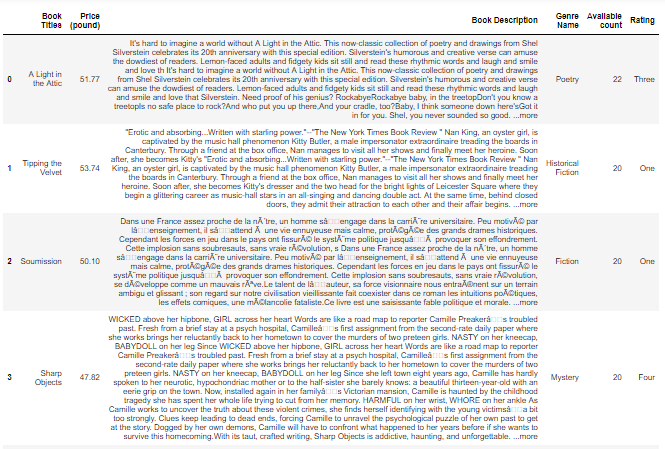

In [198]:
def main_scraping_allbooksinfo():
    '''This function uses previously defined functions collect_headerinfo, get_eachbooklinks & get_eachbookinfo to return a dataframe with all information about all books in the website'''
    Totalbooks_count,perpage_count,Total_pages=collect_headerinfo()
    allbooks_url=get_eachbooklinks(Totalpages=Total_pages,perpagecount=perpage_count)
    Books_infotable=get_eachbookinfo(bookurllist=allbooks_url)
    return Books_infotable

all_books_info=scraping_allbooksinfo()
all_books_info.head(4)

Progress of data downloaded from web
..................................................
 Getting details for each book. There are 1000 books so it might take few minutes. Thank you for your patience
....................................................................................................

....................................................................................................

..................................................
 25% data downloaded
..................................................

....................................................................................................

....................................................................................................
 50% data downloaded


....................................................................................................

....................................................................................................

...........................................

,Book Titles,Price (pound),Book Description,Genre Name,Available count,Rating
0,A Light in the Attic,51.77,"It's hard to imagine a world without A Light in the Attic. This now-classic collection of poetry and drawings from Shel Silverstein celebrates its 20th anniversary with this special edition. Silverstein's humorous and creative verse can amuse the dowdiest of readers. Lemon-faced adults and fidgety kids sit still and read these rhythmic words and laugh and smile and love th It's hard to imagine a world without A Light in the Attic. This now-classic collection of poetry and drawings from Shel Silverstein celebrates its 20th anniversary with this special edition. Silverstein's humorous and creative verse can amuse the dowdiest of readers. Lemon-faced adults and fidgety kids sit still and read these rhythmic words and laugh and smile and love that Silverstein. Need proof of his genius? RockabyeRockabye baby, in the treetopDon't you know a treetopIs no safe place to rock?And who put you up there,And your cradle, too?Baby, I think someone down here'sGot it in for you. Shel, you never sounded so good. ...more",Poetry,22,Three
1,Tipping the Velvet,53.74,"""Erotic and absorbing...Written with starling power.""--""The New York Times Book Review "" Nan King, an oyster girl, is captivated by the music hall phenomenon Kitty Butler, a male impersonator extraordinaire treading the boards in Canterbury. Through a friend at the box office, Nan manages to visit all her shows and finally meet her heroine. Soon after, she becomes Kitty's ""Erotic and absorbing...Written with starling power.""--""The New York Times Book Review "" Nan King, an oyster girl, is captivated by the music hall phenomenon Kitty Butler, a male impersonator extraordinaire treading the boards in Canterbury. Through a friend at the box office, Nan manages to visit all her shows and finally meet her heroine. Soon after, she becomes Kitty's dresser and the two head for the bright lights of Leicester Square where they begin a glittering career as music-hall stars in an all-singing and dancing double act. At the same time, behind closed doors, they admit their attraction to each other and their affair begins. ...more",Historical Fiction,20,One
2,Soumission,50.10,"Dans une France assez proche de la nÃ´tre, un homme sâengage dans la carriÃ¨re universitaire. Peu motivÃ© par lâenseignement, il sâattend Ã une vie ennuyeuse mais calme, protÃ©gÃ©e des grands drames historiques. Cependant les forces en jeu dans le pays ont fissurÃ© le systÃ¨me politique jusquâÃ provoquer son effondrement. Cette implosion sans soubresauts, sans vraie rÃ©volution, s Dans une France assez proche de la nÃ´tre, un homme sâengage dans la carriÃ¨re universitaire. Peu motivÃ© par lâenseignement, il sâattend Ã une vie ennuyeuse mais calme, protÃ©gÃ©e des grands drames historiques. Cependant les forces en jeu dans le pays ont fissurÃ© le systÃ¨me politique jusquâÃ provoquer son effondrement. Cette implosion sans soubresauts, sans vraie rÃ©volution, se dÃ©veloppe comme un mauvais rÃªve.Le talent de lâauteur, sa force visionnaire nous entraÃ®nent sur un terrain ambigu et glissant ; son regard sur notre civilisation vieillissante fait coexister dans ce roman les intuitions poÃ©tiques, les effets comiques, une mÃ©lancolie fataliste.Ce livre est une saisissante fable politique et morale. ...more",Fiction,20,One
3,Sharp Objects,47.82,"WICKED above her hipbone, GIRL across her heart Words are like a road map to reporter Camille Preakerâs troubled past. Fresh from a brief stay at a psych hospital, Camilleâs first assignment from the second-rate daily paper where she works brings her reluctantly back to her hometown to cover the murders of two preteen girls. NASTY on her kneecap, BABYDOLL on her leg Since WICKED above her hipbone, GIRL across her heart Words are like a road map to reporter Camille Preakerâs troubled past. Fresh from a brief stay at a psych hospital, Camilleâs first assignmen

### Part 2: Data Analysis

Using the dataframe created from Part 1 we can do some analysis to answer some of our questions. We have 2 functions which will be used to answer some of our questions

Function budget_based_books(Books_infotable) takes in a dataframe obtained from Part 1. 
- It prompts user to enter the minimum and maximum price they can afford and returns a dataframe with books that is within users' budget  


In [199]:
def budget_based_books(Books_infotable):
    '''This function takes in a dataframe and returns all books that match within budget specified by user'''
    min_price=float(input('Enter min price you can afford. Book prices start from 10 pounds: '))
    max_price=float(input('Enter max price you can afford. Book prices go upto 60 pounds: '))
    Books_table=Books_infotable.drop('Book Description', axis=1)  ##Just removing the book description column
    Books_byprice=Books_table[(Books_table['Price (pound)']>=min_price) &  (Books_table['Price (pound)']<=max_price)] ##returns all rows from dataframe which satisfies the condition of low and max price specified by user
    Books_byprice.index=range(1,len(Books_byprice)+1)  ##starts the index from 1 
    return Books_byprice



Function rating_based_books(Books_infotable) takes in a dataframe from Part 1 or from function budget_based_books. 
- It prompts user to enter rating value in words. 
- Function ensures that rating entered has all small letters by calling method capitalize() in order to match with values in dataframe. 
- This function returns a dataframe with books and its information that satisfies the rating condition given by user 


In [200]:
def rating_based_books(Books_infotable):
    '''This function takes in dataframe which has all information about all books and returns all book titles that has rating mentionedd by user'''
    ##asks user to enter a rating in words
    rating=input("""Specify a rating from 1-5 in words in order to get book titles of that rating eg:Three: """)
    rating=rating.capitalize()   ##ensures that 1st letter is capital  to match with rating in records
#    book_titles_series=Books_infotable[Books_infotable.Rating==rating]['Book Titles']  ##finding books of that rating which returns titles in series
#    book_titles=pd.DataFrame(book_titles_series.values,columns=['Book Titles'],index=range(1,len(book_titles_series)+1))  ##converting series to dataframe 
    book_titles=Books_infotable[Books_infotable.Rating==rating][['Book Titles','Genre Name']]
    book_titles.index=range(1,len(book_titles)+1)
    pd.set_option("display.max_colwidth", 100000,'display.max_rows', 500)   ## ensures colwidth to display entire text without truncating
    return book_titles


### Research Question 1. 
#### What are the top 10 genre types ordered by number of unique book titles available for an user to buy when user specifies the budget and also the ratings while purchasing? ***Note:*** Exclude genre types 'Default' and 'Add a comment' that makes no sense in this case 

- To answer 1st research questions a main function is created which will call budget_based_books and rating_based_books functions and filter rows to remove 'default' and 'add a comment' genre types. 
- The function will then create a visualization using Matplotlib library of Python which will show 10 genre types ranked by number of unique books it can offer to user based on budget and rating specified

**Try:** main_visualization_bookcount(allbooks_dataframe=all_books_info)  where all_books_info is the result from Part 1 . When user has budget between 11 and 20 and wants to choose five star rating books Sequential Art genre gives user with 5 options. See visualization below for top 10 genres<br>
**Expected result:** 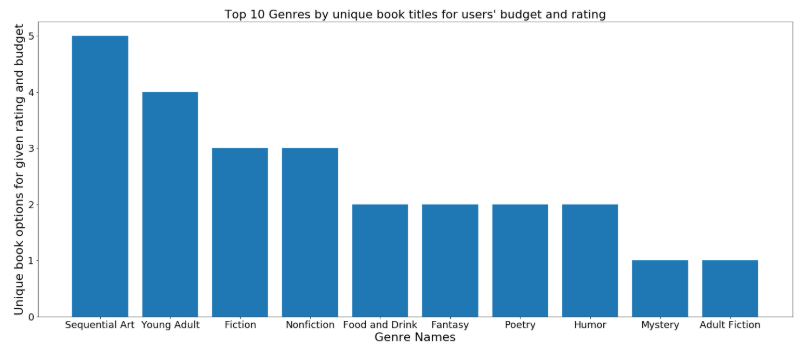

Enter min price you can afford. Book prices start from 10 pounds: 11
Enter max price you can afford. Book prices go upto 60 pounds: 20
Specify a rating from 1-5 in words in order to get book titles of that rating eg:Three: five


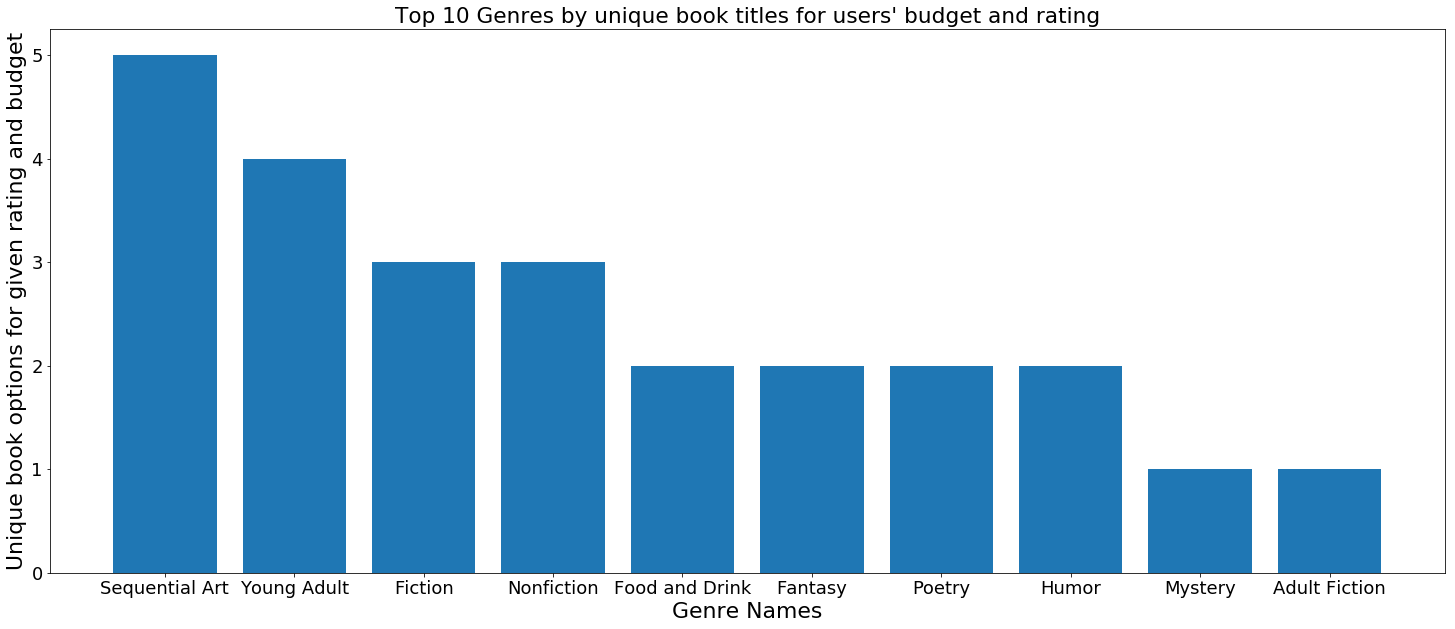

In [201]:
import matplotlib.pyplot as plt
def main_visualization_bookcount(allbooks_dataframe):
    '''This function takes in dataframe containing scraped information and produces visualization to show genres by unique books when budget and ratings are input by user'''
    ##Collecting all information needed for visualization
    
    ##Filtering dataset to contain books within budget 
    budget_books=budget_based_books(allbooks_dataframe)
    ##Filtering dataset to contain books within budget and now rating
    budget_rating_books=rating_based_books(budget_books)
    
    #Removing genre types that dont make sense and saving clean dataframe back to same variable
    budget_rating_books=budget_rating_books[(budget_rating_books['Genre Name']!='Default') &(budget_rating_books['Genre Name']!='Add a comment') ]
    
    #Adding a new column called count that has count of each genre within dataframe . This gets mapped to genre names. Duplicates rows are still present
    budget_rating_books['count'] = budget_rating_books['Genre Name'].map(budget_rating_books['Genre Name'].value_counts())
    
    ##Cleaning dataset to keep only genre names and count columns
    budget_rating_books.drop(columns =['Book Titles'], inplace = True)
    
    ##dropping duplicate genre names and arranging descending order by unique book counts and showing only top 10
    unique_genres_count=budget_rating_books.drop_duplicates()
    unique_genres_count= unique_genres_count.sort_values('count',ascending=False).head(10)
    
    #Plotting section 
    plt.figure(figsize=(25,10))  ##plot window size adjustment
    x=unique_genres_count['Genre Name']   ##
    y=unique_genres_count['count']
    plt.rcParams.update({'font.size': 18}) ##changing font size of axis titles
    plt.bar(x,y)   ##plotting bar graph
    plt.title('Top 10 Genres by unique book titles for users\' budget and rating')  
    plt.xlabel('Genre Names',fontsize=22)
    plt.ylabel('Unique book options for given rating and budget',fontsize=22)
    plt.show()
    
main_visualization_bookcount(allbooks_dataframe=all_books_info)

### Reearch Question 2 
#### For a given user rating, what is the most common word in book title that influences people to read and give good ratings?
- To answer this question we are going to build a main_booktitle_wordchoice visualization which will take in a dataframe obtained from Part 1
- Once the dataframe is filtered to have only book titles, the words inside are converted to lower case with double quotes
- Using this modified dataset and wordcloud library from Python wordcloud is generated showing most frequently used word in book titles for books of user rating chosen

**Try:** main_booktitle_wordchoice(allbooks_dataframe=all_books_info)   where all_books_info is the dataframe obtained from Part 1. When five star rating is chosen one can see that people choose books which has words like 'life', 'recipe', 'vol'etc.., as shown in image below

**Expected answer:** 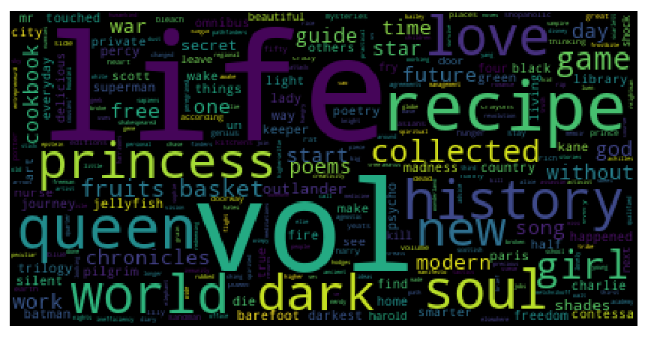


Specify a rating from 1-5 in words in order to get book titles of that rating eg:Three: five


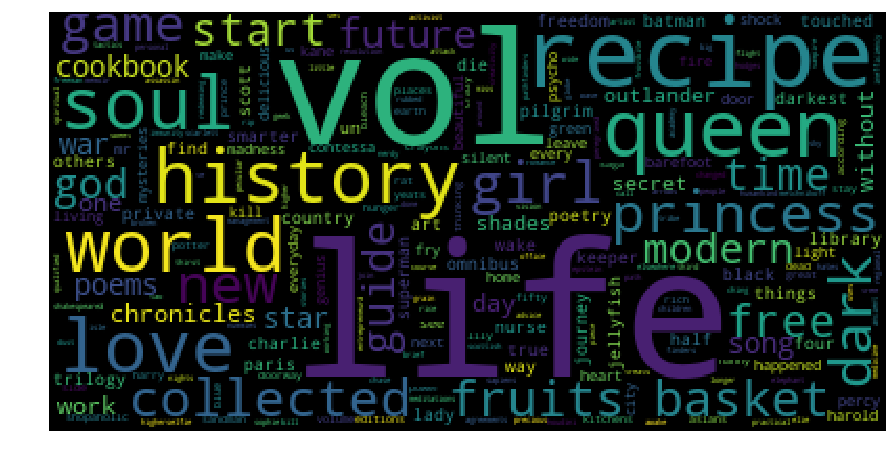

In [202]:
import numpy as np
from wordcloud import WordCloud, STOPWORDS
def main_booktitle_wordchoice(allbooks_dataframe):
    '''This function takes in dataframe consisting of information scraped from website and displays visualization showing frequently used words in book titles based on users\' rating'''
    ##filter books dataframe by rating mentioned by user
    books_by_rating=rating_based_books(allbooks_dataframe)
    
    ##keeps only book titles column
    books_by_rating.drop(columns=['Genre Name'],inplace=True)
    
    ##puts all book titles inside a "" and converts all words to lower case
    word_string=" ".join(books_by_rating['Book Titles'].str.lower())
    
    #Conditions how wordcloud should look
    wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='black', 
                      max_words=350
                         ).generate(word_string)
    
    ##size of the plot window
    plt.figure(figsize=(15,10))
    plt.clf()  
    plt.imshow(wordcloud)   ##Shows the word cloud
    plt.axis('off')  ##removes the axes x and y with some values
    plt.show()

main_booktitle_wordchoice(allbooks_dataframe=all_books_info)